# Carbon Chain (Part 1)

This example demonstrates the calculations of density of states (DOS) and transmission values for a two-probe carbon chain.

## Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import junpy as jp
from junpy.factory import nanodcal
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'font.size': 12}

## Load Device

We use the `nanodcal.load_nanodcal_device` function to load the structures and Hamiltonians from the results of Nanodcal.

In [2]:
filename = (
    'jpdataset/nanodcal/twoprobe_carbon_chain/'
    'LDA_SP_dC-3.0-ang/sys_6C-vac5ang-6C/v0.00/NanodcalStructObject.mat')
device = nanodcal.load_nanodcal_device(filename)

## Calculate Density of States

The `jp.DensityOfStates` class is used to contruct a DOS calculation. We set the `device` parameter to input the loaded nanodcal object. `energies` specifies the energies points to be computed. `etaSigma` and `etaGF` set the infinitesimal imaginay number for the electrode self-energy and central Green's function, respectively. Next, we use `jp.run` to start the calculation. Users can set the value of `savefile` to save the results, which can be loaded via the `jp.load` function.

In [3]:
calcr_dos = jp.DensityOfStates(
    device=device,
    energies=np.linspace(-4, 6, 101),
    etaSigma=0.01,
    etaGF=0.01)
jp.run(calcr_dos, savefile=False)

JunPy version---------------------------: 0.15.0.post29+ga5b3260
Parallelization information
    BLAS Vendor-----------------------------: MKL
    Total number of MPI processes-----------: 1
    OMP_NUM_THREADS-------------------------: 1
    MKL_NUM_THREADS-------------------------: unset
    OPENBLAS_NUM_THREADS--------------------: unset
Calculating density of states... (2024-08-15 20:26:10)
    Device information
        bias (mu2-mu1)--------------------------: 0.0
        central.numberOfSites-------------------: 12
        central.spinType------------------------: SpinType.CollinearSpin
        lead1.numberOfSites---------------------: 3
        lead1.spinType--------------------------: SpinType.CollinearSpin
        lead1.direction-------------------------: -3
        lead1.temperature-----------------------: 0.0
        lead1.chemicalPotential-----------------: -0.0
        lead2.numberOfSites---------------------: 3
        lead2.spinType--------------------------: SpinType.C

The `[calcr].densityOfStates` function returns the calculated DOS values with the shape of `(#kpoints, #energies, #spin)`. Setting `spin='diag'` indicates that the function will return both spin-up and spin-down values. 

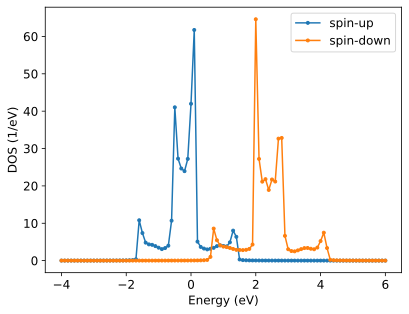

In [4]:
# shape: (#kpoints, #energies, #spin)
dos = calcr_dos.densityOfStates(spin='diag')

plt.plot(calcr_dos.energies, dos[0,:,0], '.-', label='spin-up')
plt.plot(calcr_dos.energies, dos[0,:,1], '.-', label='spin-down')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (1/eV)')
plt.legend()
plt.show()

## Calculate Transmission

Similar to the DOS calculation, we use `jp.Transmission` to construct the transmission calculation.

In [5]:
calcr_trans = jp.Transmission(
    device=device,
    energies=np.linspace(-4, 6, 101),
    etaSigma=0.01,
    etaGF=0.01)
jp.run(calcr_trans, savefile=False)

JunPy version---------------------------: 0.15.0.post29+ga5b3260
Parallelization information
    BLAS Vendor-----------------------------: MKL
    Total number of MPI processes-----------: 1
    OMP_NUM_THREADS-------------------------: 1
    MKL_NUM_THREADS-------------------------: unset
    OPENBLAS_NUM_THREADS--------------------: unset
Calculating transmission... (2024-08-15 20:26:28)
    Device information
        bias (mu2-mu1)--------------------------: 0.0
        central.numberOfSites-------------------: 12
        central.spinType------------------------: SpinType.CollinearSpin
        lead1.numberOfSites---------------------: 3
        lead1.spinType--------------------------: SpinType.CollinearSpin
        lead1.direction-------------------------: -3
        lead1.temperature-----------------------: 0.0
        lead1.chemicalPotential-----------------: -0.0
        lead2.numberOfSites---------------------: 3
        lead2.spinType--------------------------: SpinType.Collin

After the evaluation, the transmission values are retrieved using `[calcr].transmission`.

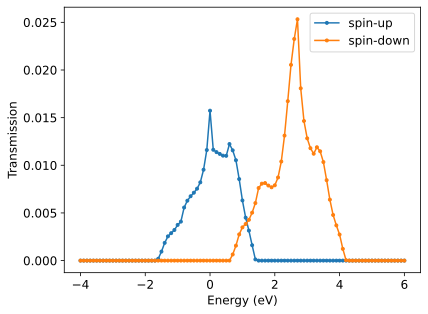

In [6]:
# shape: (#kpoints, #energies, #spin)
trans = calcr_trans.transmission(spin='diag')

plt.plot(calcr_trans.energies, trans[0,:,0], '.-', label='spin-up')
plt.plot(calcr_trans.energies, trans[0,:,1], '.-', label='spin-down')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.legend()
plt.show()